In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D0712 08:34:24.860286260      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0712 08:34:24.860311408      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0712 08:34:24.860314972      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0712 08:34:24.860317601      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0712 08:34:24.860320230      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0712 08:34:24.860323018      15 config.cc:119]     

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Generating train examples...:  99%|█████████▉| 24776/25000 [00:08<00:00, 4498.96 examples/s]
                                                                                            
Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8LDENN/imdb_reviews-train.tfrecord*...:   0%|          | 0/25000 [00:00<?, ? examples/s]
Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8LDENN/imdb_reviews-train.tfrecord*...:  52%|█████▏    | 13061/25000 [00:00<00:00, 130582.73 examples/s]
Generating test examples...: 100%|█████████▉| 24997/25000 [00:05<00:00, 5136.69 examples/s]
                                                                                           
Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8LDENN/imdb_reviews-test.tfrecord*...:   0%|          | 0/25000 [00:00<?, ? examples/s]
Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8LDE

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [10]:
def plot_graphs(history, metrics):
  fig, axes = plt.subplots(1, len(metrics), figsize=(12, 4), sharey=True)
  for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i + 1)
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
  plt.show()

# Flatten

In [7]:
embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [8]:
NUM_EPOCHS = 10
BATCH_SIZE = 128


history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 2s 7ms/step - loss: 0.6242 - accuracy: 0.6458 - val_loss: 0.4071 - val_accuracy: 0.8264
Epoch 2/10
196/196 [==============================] - 1s 5ms/step - loss: 0.3194 - accuracy: 0.8690 - val_loss: 0.3356 - val_accuracy: 0.8519
Epoch 3/10
196/196 [==============================] - 1s 5ms/step - loss: 0.1988 - accuracy: 0.9298 - val_loss: 0.3562 - val_accuracy: 0.8448
Epoch 4/10
196/196 [==============================] - 1s 5ms/step - loss: 0.1085 - accuracy: 0.9730 - val_loss: 0.4155 - val_accuracy: 0.8308
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0506 - accuracy: 0.9931 - val_loss: 0.4396 - val_accuracy: 0.8355
Epoch 6/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0225 - accuracy: 0.9985 - val_loss: 0.4795 - val_accuracy: 0.8346
Epoch 7/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.9994 - val_loss: 0.5163 - val_accuracy: 0.8316
Epoch 

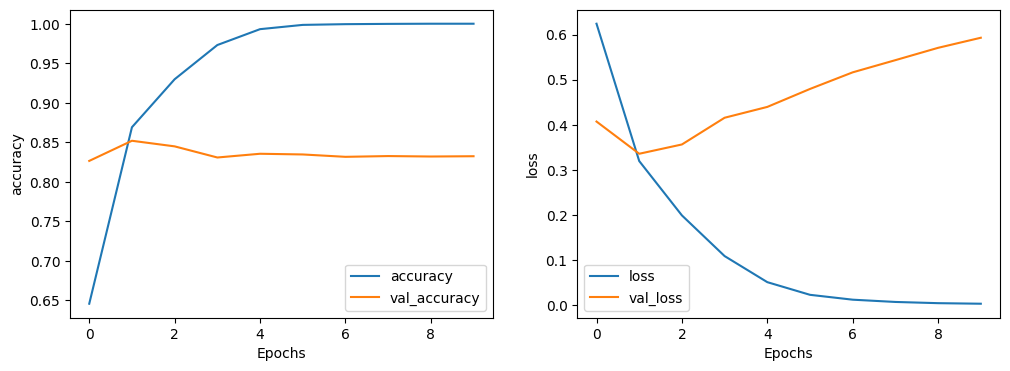

In [12]:
plot_graphs(history_flatten,['accuracy','loss'])

# LSTM

In [16]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6


model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [17]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 21s 87ms/step - loss: 0.5574 - accuracy: 0.7028 - val_loss: 0.4151 - val_accuracy: 0.8269
Epoch 2/10
196/196 [==============================] - 16s 82ms/step - loss: 0.3123 - accuracy: 0.8725 - val_loss: 0.3533 - val_accuracy: 0.8474
Epoch 3/10
196/196 [==============================] - 16s 81ms/step - loss: 0.2434 - accuracy: 0.9062 - val_loss: 0.3780 - val_accuracy: 0.8393
Epoch 4/10
196/196 [==============================] - 17s 86ms/step - loss: 0.1991 - accuracy: 0.9268 - val_loss: 0.4136 - val_accuracy: 0.8346
Epoch 5/10
196/196 [==============================] - 17s 88ms/step - loss: 0.1663 - accuracy: 0.9410 - val_loss: 0.4844 - val_accuracy: 0.8230
Epoch 6/10
196/196 [==============================] - 17s 84ms/step - loss: 0.1396 - accuracy: 0.9509 - val_loss: 0.5551 - val_accuracy: 0.8147
Epoch 7/10
196/196 [==============================] - 17s 85ms/step - loss: 0.1187 - accuracy: 0.9588 - val_loss: 0.6085 - val_accuracy:

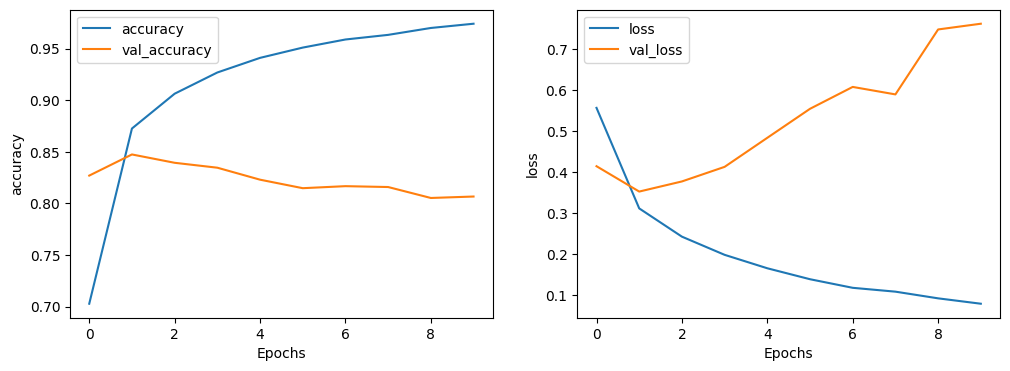

In [19]:
plot_graphs(history_lstm,['accuracy','loss'])

# GRU

In [20]:
embedding_dim = 16
gru_dim = 32
dense_dim = 6

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [21]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 20s 82ms/step - loss: 0.5787 - accuracy: 0.6600 - val_loss: 0.3650 - val_accuracy: 0.8452
Epoch 2/10
196/196 [==============================] - 15s 76ms/step - loss: 0.3120 - accuracy: 0.8710 - val_loss: 0.3424 - val_accuracy: 0.8516
Epoch 3/10
196/196 [==============================] - 15s 77ms/step - loss: 0.2423 - accuracy: 0.9051 - val_loss: 0.3768 - val_accuracy: 0.8464
Epoch 4/10
196/196 [==============================] - 16s 81ms/step - loss: 0.1951 - accuracy: 0.9270 - val_loss: 0.3883 - val_accuracy: 0.8400
Epoch 5/10
196/196 [==============================] - 16s 80ms/step - loss: 0.1630 - accuracy: 0.9412 - val_loss: 0.4470 - val_accuracy: 0.8344
Epoch 6/10
196/196 [==============================] - 16s 80ms/step - loss: 0.1288 - accuracy: 0.9556 - val_loss: 0.5432 - val_accuracy: 0.8275
Epoch 7/10
196/196 [==============================] - 16s 80ms/step - loss: 0.1016 - accuracy: 0.9659 - val_loss: 0.5643 - val_accuracy:

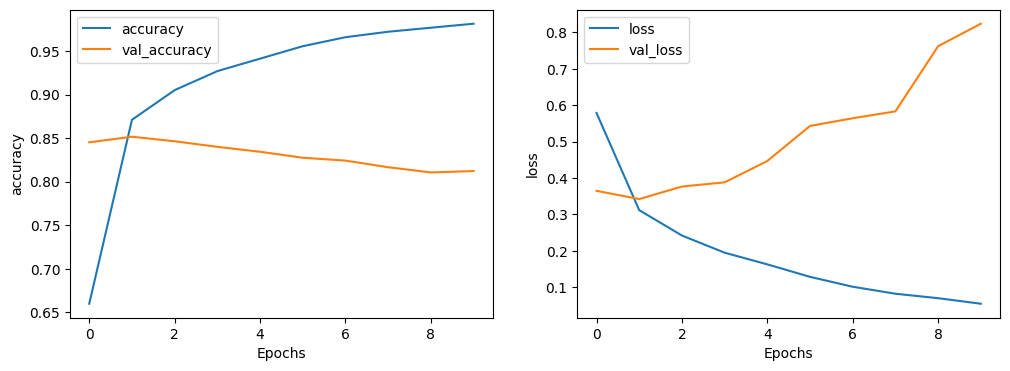

In [22]:
plot_graphs(history_gru,['accuracy','loss'])